In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/Users/patrickfahy99/Documents/kaggle_datasets/loan-default-prediction/train.csv')
test = pd.read_csv('/Users/patrickfahy99/Documents/kaggle_datasets/loan-default-prediction/test.csv')
pd.set_option('display.max_columns', None)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (417) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
invalid = train.select_dtypes(include=['object']).columns
train.drop(invalid, axis=1, inplace=True)
test.drop(invalid, axis=1, inplace=True)
test_id = test['id'].copy
test.drop('id', axis=1, inplace = True)

In [4]:
missing = train.isnull().sum()
missing = pd.DataFrame(missing[missing!=0])
missing.columns = ['No. of missing values']
missing['Percentage'] = 100*missing['No. of missing values']/train.id.count()
missing.sort_values(by="Percentage", ascending=False)

,No. of missing values,Percentage
f662,18833,17.856093
f663,18833,17.856093
f160,18736,17.764125
f159,18736,17.764125
f169,18417,17.461672
...,...,...
f675,1,0.000948
f678,1,0.000948
f677,1,0.000948
f765,1,0.000948


In [5]:
train.loss

0         0
1         0
2         0
3         0
4         0
         ..
105466    0
105467    0
105468    0
105469    0
105470    0
Name: loss, Length: 105471, dtype: int64

In [6]:
train.loss = train.loss/train.loss
train.loss = train.loss.fillna(0)

In [7]:
train.loss

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
105466    0.0
105467    0.0
105468    0.0
105469    0.0
105470    0.0
Name: loss, Length: 105471, dtype: float64

In [8]:
train = train.fillna(train.mean())
test = test.fillna(train.mean())
[train.isnull().sum().sum(), test.isnull().sum().sum()]

[0, 0]

In [9]:
X_train = train.iloc[:,1:751].copy()
y_train = train.iloc[:,751].copy()

In [10]:
from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train))
test = scalar.transform(test)

Text(0, 0.5, 'cumulative explained variance')

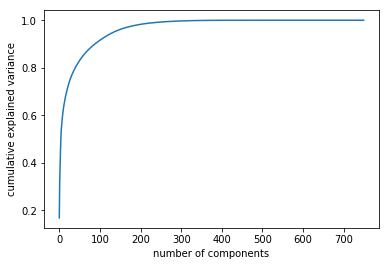

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [12]:
np.cumsum(pca.explained_variance_ratio_)[200]

0.9828385790683806

In [13]:
final_pca = PCA(n_components=200)
final_pca.fit(X_train)
X_train = final_pca.transform(X_train)
X_train = pd.DataFrame(X_train)
test = final_pca.transform(test)
test = pd.DataFrame(data = test)

train = X_train
train['loss'] = y_train
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,loss
0,-16.662354,7.483083,-4.630055,-3.329767,-2.978395,-3.189481,4.972938,-2.279586,-4.153026,-0.815999,-1.814862,5.075084,1.363656,-0.650317,-0.029848,0.145288,5.281030,-3.543648,1.020464,-7.456899,-2.265003,-2.281931,2.580325,1.955695,-1.056515,-0.800058,-0.018017,-1.012166,-0.129993,0.552740,1.689874,0.075028,0.898962,0.996707,-2.133897,1.326310,1.810321,0.561395,2.746614,-0.400127,-2.187720,-0.783577,1.320889,0.342368,1.412909,-0.104139,0.542379,-0.110280,0.185572,-0.936529,-0.059064,1.277126,1.620048,0.670012,-0.911428,0.529508,-0.032093,1.274287,0.884493,0.307001,-0.784341,-0.553523,1.805187,0.427717,-0.380291,-0.376491,0.658000,-0.118205,0.699799,0.526913,-0.487267,-0.320912,0.720437,-1.419600,-0.036196,-0.510649,0.389161,-0.375538,-0.474483,0.131598,-1.146173,0.253960,-0.446966,0.358373,0.240912,-0.169894,0.351949,-1.663039,0.251584,0.847122,0.228911,0.016631,-0.494061,-0.315617,0.551338,0.574453,0.042967,-1.028916,-0.540982,-0.397445,0.208621,0.568527,0.334329,-0.139896,0.579230,-0.739892,-0.022982,-0.148421,0.622506,-0.664562,-0.098864,0.373859,-0.182599,-0.313069,0.237495,-1.148919,0.645659,0.108146,1.097852,-0.440972,0.237197,0.188966,0.824594,0.054778,1.781174,1.209436,-0.739961,0.414663,-0.089178,0.841189,-0.051811,-0.397314,-0.279930,2.016521,-0.284965,1.733081,-0.583545,-0.112152,0.320097,0.271318,0.525455,-0.373524,0.200197,-0.343906,-0.336358,1.109059,-0.731748,-1.514334,0.983906,0.373697,0.629747,-0.094615,1.351077,0.654711,-0.165108,-0.445034,1.205199,-0.664097,0.970895,-0.563742,-0.282568,0.071140,-0.343373,0.713521,-0.615117,-0.123159,-0.532232,-0.517242,-0.179370,0.661519,-0.025872,0.019920,-0.159110,-0.518085,0.093852,-0.278855,1.611156,-0.875237,0.165838,-0.219855,0.808498,-1.016454,1.051132,-0.332397,0.945768,-0.077253,0.223103,-0.315694,-0.112593,-0.279402,-0.160289,-0.110709,0.353827,-0.521766,0.470664,-0.256849,-1.002160,1.027077,-0.071930,0.975478,0.0
1,2.184920,-13.574715,1.896089,-0.908516,-5.643978,2.884871,-2.210406,5.485957,0.262457,2.745366,0.452479,1.504812,1.447752,0.317201,0.363026,-1.501797,0.598312,3.885818,2.658755,-1.759325,-0.355152,-0.773340,1.154518,0.995816,-1.590376,-0.512205,-0.190814,0.449006,2.217113,0.348084,0.895690,-0.835758,1.142067,-0.324535,-1.676646,-0.680298,-1.692263,0.734374,2.896463,-0.156773,0.199926,0.888312,0.491958,-0.664472,-0.180151,0.325661,0.253948,-0.278883,0.120460,0.543622,-0.147084,-0.086818,0.919109,0.507475,-0.330995,-0.301048,0.134813,0.249510,-0.187928,-0.973828,0.780554,-0.320274,0.094134,0.738151,0.623226,-0.332218,-1.195367,-0.568774,-0.351192,-0.798165,0.854993,-1.333516,0.616890,-0.315262,-0.164585,-0.527999,-0.076230,-0.902113,-0.599355,-0.228146,0.247029,0.061224,0.205031,-0.708475,0.212644,0.281391,-0.151812,0.342463,0.369334,1.105937,-1.069558,0.394452,-0.520068,0.289018,-0.370286,0.247013,-0.700735,-0.411921,-1.733120,0.966610,0.670916,0.537940,-0.692921,-0.494240,0.351815,0.137834,0.479077,0.567473,0.441030,0.626136,-0.454909,0.370629,0.336833,-0.436542,0.068580,-0.038971,-0.112331,-0.088822,0.210249,0.084539,-0.786769,0.692866,-0.599566,0.357211,0.544862,0.203455,0.019429,-1.742021,-0.501509,0.626644,0.042004,-0.097279,0.735354,-1.538904,-0.565282,0.176302,-0.176011,0.439931,0.348398,0.316392,-0.515026,0.186772,1.073116,-1.340042,-0.128077,-0.149637,-0.098159

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X_train, y_train):
    print("Train:", train_index, "Test:", test_index)
    original_X_train, original_X_test = X_train.iloc[train_index], X_train.iloc[test_index]
    original_y_train, original_y_test = y_train.iloc[train_index], y_train.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_y_train))
print(test_counts_label/ len(original_y_test))

Train: [ 20989  20990  20991 ... 105468 105469 105470] Test: [    0     1     2 ... 22006 22017 22032]
Train: [     0      1      2 ... 105468 105469 105470] Test: [20989 20990 20991 ... 44421 44429 44433]
Train: [     0      1      2 ... 105468 105469 105470] Test: [41964 41965 41966 ... 64787 64792 64807]
Train: [     0      1      2 ... 105468 105469 105470] Test: [63151 63152 63153 ... 85582 85592 85598]
Train: [    0     1     2 ... 85582 85592 85598] Test: [ 84233  84234  84235 ... 105468 105469 105470]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.90724961 0.09275039]
[0.9072248 0.0927752]


In [15]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = train.sample(frac=1)

# amount of losses are 9783.
fraud_df = df.loc[df['loss'] != 0.0]
non_fraud_df = df.loc[df['loss'] == 0.0][:9783]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,loss
31798,-9.629798,-3.801741,0.394264,-3.426513,-4.486766,-1.012539,1.362463,-0.025979,1.955604,-0.976127,2.506540,2.344223,1.188054,-0.727863,-4.027414,3.340161,-3.605054,0.633704,-1.121158,0.409928,0.304399,-0.143754,0.766415,1.333850,-0.053456,0.685573,-0.508780,0.095325,1.919864,-0.819365,0.955409,1.200029,-0.320854,0.820564,0.052847,0.617797,1.220905,1.489552,-0.435404,-0.942055,-0.257341,-0.086329,-0.077580,-1.147914,0.380339,0.091812,-0.014186,-1.198124,0.815822,1.399373,0.431198,-1.666369,0.152750,-0.036757,0.071472,0.555659,0.463459,-0.076392,0.361180,1.020910,-0.297464,0.685503,-1.314786,0.609625,-0.485328,0.584137,-0.366547,0.488240,-1.913621,-0.070717,0.078581,0.380432,-1.900458,-1.057833,-0.741827,-1.440755,0.496482,0.041472,-0.708267,0.162066,0.635978,-0.106871,0.294874,1.407850,0.275051,-0.140939,-0.558606,0.277316,0.436400,-0.723384,1.533983,-1.018989,-1.488017,-0.365272,-1.449904,1.024847,-1.501024,-0.608423,-0.575063,0.304171,0.044442,0.899933,-1.412643,-0.594324,0.773388,0.741192,0.131546,0.786448,-0.714231,0.377990,-0.951551,-0.578134,-0.050741,0.353558,-0.286660,0.318556,-0.709711,-0.000031,-0.179911,-0.221874,0.333303,0.186250,0.643823,1.041414,-0.336495,-1.008079,-0.194776,-1.680771,0.928589,0.712429,-0.066217,0.489784,0.957072,-0.667805,0.329162,0.434022,0.515564,-0.962799,0.469530,0.422824,0.087833,0.333297,0.671956,-0.487993,-1.292517,0.414064,0.267172,0.110147,-0.571908,0.005669,-0.146434,-0.623109,1.806671,-1.520527,-0.897240,-1.384335,-0.986821,0.791931,-0.088727,-0.127868,-0.453086,0.379612,-0.257417,-0.995579,-1.397507,0.604019,0.191820,-0.071077,-0.804672,-0.256495,-0.204342,-0.135847,0.446253,0.118253,1.027069,0.426226,-0.305103,-0.181312,-1.305113,-0.074733,-0.774077,-0.599424,-0.023263,-0.328151,-0.311072,0.199814,0.379471,0.384992,-0.550021,-0.470653,0.132961,-0.440081,-0.476986,0.419943,-0.250882,-0.386304,0.077763,-0.533047,-0.082122,0.352123,1.0
27697,-0.872879,-6.488604,-3.186843,-7.331136,-1.063460,0.554462,0.576516,-1.945495,4.036887,-1.254681,1.671821,-1.741628,-0.820264,0.810772,-1.132227,-0.718910,-0.548406,0.208892,2.552987,1.740727,-1.530614,4.114974,0.563884,-0.606186,-0.747306,-1.137748,0.545585,-0.168333,-0.903372,1.173729,0.558737,-0.729050,0.424213,-1.731986,-0.253386,-0.105856,0.708029,-1.471185,-0.791158,-0.218271,-0.513851,0.129879,0.413136,1.093379,0.661599,-1.348229,0.955191,-0.093383,-1.574179,0.232654,1.143943,-0.597575,0.328893,0.156774,-0.373507,-0.321339,0.169099,-0.243571,-0.329345,1.580227,0.024053,0.271140,-0.208526,-0.064381,-0.500810,-0.169343,0.029688,-0.380562,-0.055787,-0.234423,-0.648418,0.085261,-0.319652,-0.203838,-0.125554,-0.118606,-0.182392,0.207462,1.093995,-0.157232,0.754446,1.394628,0.259824,0.259456,-0.173568,-0.621377,-0.483640,-0.159912,-1.253548,0.274020,-1.132979,-0.969403,-0.777712,-0.126609,0.391314,0.852481,-0.156464,0.266078,0.109849,0.711411,-0.754527,-0.036446,0.299386,1.327078,0.281650,0.554127,-0.937008,-0.666840,-0.386584,-0.075446,0.233067,-0.155462,0.091627,0.918623,-0.479849,-0.214000,-0.480803,-0.146848,-1.153775,-0.324491,0.458253,-0.069219,0.345552,0.126088,-0.586069,-0.753204,0.049480,0.144430,-0.694777,-1.037079,0.118927,-0.067586,0.481499,-0.008656,-0.409905,0.727814,-0.461403,-0.099075,0.441502,0.028874,0.047716,-0.152530,-0.295186,0.490954,-0.71

Distribution of the Classes in the subsample dataset
0.0    0.5
1.0    0.5
Name: loss, dtype: float64


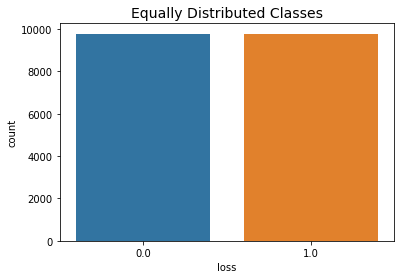

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['loss'].value_counts()/len(new_df))

sns.countplot('loss', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [17]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('loss', axis=1)
y = new_df['loss']

In [18]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5, verbose = 10)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.651, total=   0.3s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... , score=0.653, total=   0.4s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.642, total=   0.3s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.641, total=   0.4s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.660, total=   0.3s
Classifiers:  LogisticRegression Has a training score of 65.0 % accuracy score
[CV]  ................................................................
[CV] .................................... , score=0.577, total=  12.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV] .................................... , score=0.569, total=  11.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.8s remaining:    0.0s


[CV] .................................... , score=0.555, total=  11.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.7s remaining:    0.0s


[CV] .................................... , score=0.558, total=  11.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.9s remaining:    0.0s


[CV] .................................... , score=0.577, total=  11.5s
Classifiers:  KNeighborsClassifier Has a training score of 56.99999999999999 % accuracy score


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.632, total=  48.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.7s remaining:    0.0s


[CV] .................................... , score=0.636, total=  48.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] .................................... , score=0.628, total=  47.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min remaining:    0.0s


[CV] .................................... , score=0.619, total=  49.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.2min remaining:    0.0s


[CV] .................................... , score=0.653, total=  49.0s
Classifiers:  SVC Has a training score of 63.0 % accuracy score


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.533, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .................................... , score=0.524, total=   3.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] .................................... , score=0.527, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


[CV] .................................... , score=0.542, total=   3.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.5s remaining:    0.0s


[CV] .................................... , score=0.538, total=   3.0s
Classifiers:  DecisionTreeClassifier Has a training score of 53.0 % accuracy score


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.600, total=  15.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s


[CV] .................................... , score=0.631, total=  15.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.4s remaining:    0.0s


[CV] .................................... , score=0.586, total=  14.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.2s remaining:    0.0s


[CV] .................................... , score=0.614, total=  15.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV] .................................... , score=0.632, total=  15.7s
Classifiers:  RandomForestClassifier Has a training score of 61.0 % accuracy score


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.615, total=  18.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


[CV] .................................... , score=0.611, total=  17.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.8s remaining:    0.0s


[CV] .................................... , score=0.596, total=  18.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.9s remaining:    0.0s


[CV] .................................... , score=0.612, total=  21.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.606, total=  21.2s
Classifiers:  XGBClassifier Has a training score of 61.0 % accuracy score


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
training_score = cross_val_score(model, X_train, y_train, cv=5, verbose = 10)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.651, total=   0.3s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .................................... , score=0.653, total=   0.3s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV] .................................... , score=0.642, total=   0.3s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV] .................................... , score=0.641, total=   0.3s
[CV]  ................................................................
[CV] .................................... , score=0.660, total=   0.2s


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


In [21]:
y_pred = model.predict(test)
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

In [22]:
len(y_pred)

210944

In [23]:
y_pred.sum()

84565.0

In [24]:
y_tr = model.predict(train.drop('loss', axis=1))
y_tr

array([1., 0., 1., ..., 1., 0., 1.])

In [25]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train['loss'],y_tr)
print(cm)

[[60594 35094]
 [ 3072  6711]]
